### CNN multiclass classification
#### Cifar10


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math
from tensorflow.keras.models import load_model, Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from collections import Counter
import pandas as pd
from tensorflow.keras.callbacks import Callback
from datetime import datetime, timezone
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers
import tensorflow as tf


In [2]:
import gc
model = None
gc.collect()

35

In [3]:
# How to check if the code is running on GPU or CPU?
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
tf.test.is_gpu_available()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8601974968128252362
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6616023695
locality {
  bus_id: 1
  links {
    link {
      device_id: 1
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 11275964186967450669
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:0a:00.0, compute capability: 6.1"
, name: "/device:GPU:1"
device_type: "GPU"
memory_limit: 6616023695
locality {
  bus_id: 1
  links {
    link {
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 309478388901998259
physical_device_desc: "device: 1, name: GeForce GTX 1070, pci bus id: 0000:0b:00.0, compute capability: 6.1"
]


True

In [4]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)
## pixel normalization to float 
X_train = X_train/255.0
X_test = X_test/255.0
X_train[0,0,0]

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print('Y:', Y_test.shape)

(10000, 32, 32, 3)
(50000, 32, 32, 3)
(10000, 1)
(50000, 1)
Y: (10000, 10)


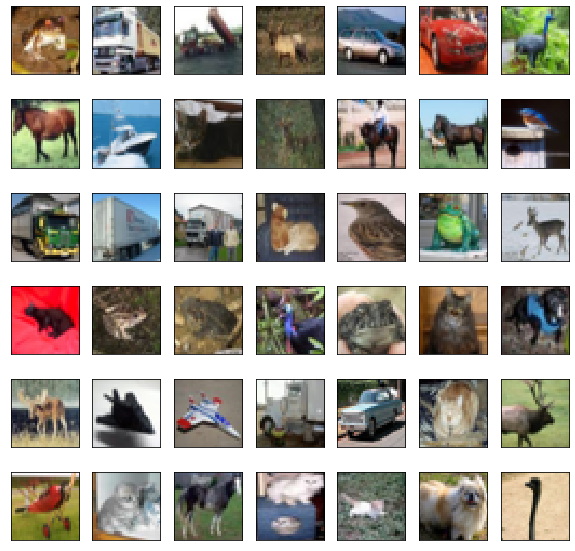

In [5]:
fig= plt.figure(figsize=(10,10))

for i in range(42):
    ax = fig.add_subplot(6,7, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i])

### The model instance creation & compile part should be inside the MirroredStrategy statement.

In [6]:
tf.debugging.set_log_device_placement(True)

In [7]:
## Dual  GPU 
#strategy =  tf.distribute.MirroredStrategy()
#strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"],cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())
strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0"],cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))
with strategy.scope():
    model = Sequential()
    # Block 1
    model.add(Conv2D(filters=64, kernel_size=5, padding='same', strides=1, activation='relu', input_shape=(32,32,3,)))
    model.add(Conv2D(filters=64, kernel_size=5, padding='same', strides=1, activation='relu'))
    model.add(MaxPool2D(pool_size=2))
    model.add(Dropout(0.2))
    
    
    model.add(Conv2D(filters=64, kernel_size=5, padding='same', strides=1, activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', strides=1, activation='relu'))    
    model.add(MaxPool2D(pool_size=2))
    model.add(Dropout(0.2))
        
    model.add(Flatten())
    model.add(Dense(256, activation='relu', name='fc1'))
    model.add(BatchNormalization())    
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax', name='predictions')) #최종은 항상 클래스 종류의 개수 
    #model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr = 1e-4, momentum=0.9), metrics=['accuracy'])
    #model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr = 0.0001, decay=1e-6), metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr = 0.000007, beta_1=0.999), metrics=['accuracy'])

    
    
model.summary()

Number of devices: 1
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:lo

In [8]:
hist = model.fit(X_train, Y_train, batch_size=40, epochs=100, validation_split=0.2)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Te

40000/40000 [==============================] - 14s 343us/sample - loss: 1.5359 - accuracy: 0.4491 - val_loss: 1.3888 - val_accuracy: 0.5007
Epoch 12/100
40000/40000 [==============================] - 13s 335us/sample - loss: 1.4993 - accuracy: 0.4608 - val_loss: 1.3600 - val_accuracy: 0.5103
Epoch 13/100
40000/40000 [==============================] - 14s 349us/sample - loss: 1.4692 - accuracy: 0.4743 - val_loss: 1.3257 - val_accuracy: 0.5288
Epoch 14/100
40000/40000 [==============================] - 14s 347us/sample - loss: 1.4364 - accuracy: 0.4879 - val_loss: 1.3151 - val_accuracy: 0.5292
Epoch 15/100
40000/40000 [==============================] - 14s 347us/sample - loss: 1.4066 - accuracy: 0.4943 - val_loss: 1.2855 - val_accuracy: 0.5436
Epoch 16/100
40000/40000 [==============================] - 13s 336us/sample - loss: 1.3738 - accuracy: 0.5093 - val_loss: 1.2557 - val_accuracy: 0.5541
Epoch 17/100
40000/40000 [==============================] - 14s 349us/sample - loss: 1.3457 - a

40000/40000 [==============================] - 14s 349us/sample - loss: 0.7677 - accuracy: 0.7346 - val_loss: 0.8123 - val_accuracy: 0.7186
Epoch 65/100
40000/40000 [==============================] - 14s 354us/sample - loss: 0.7584 - accuracy: 0.7347 - val_loss: 0.7965 - val_accuracy: 0.7234
Epoch 66/100
40000/40000 [==============================] - 15s 365us/sample - loss: 0.7550 - accuracy: 0.7382 - val_loss: 0.7868 - val_accuracy: 0.7300
Epoch 67/100
40000/40000 [==============================] - 14s 342us/sample - loss: 0.7467 - accuracy: 0.7413 - val_loss: 0.7695 - val_accuracy: 0.7357
Epoch 68/100
40000/40000 [==============================] - 14s 348us/sample - loss: 0.7378 - accuracy: 0.7467 - val_loss: 0.7925 - val_accuracy: 0.7261
Epoch 69/100
40000/40000 [==============================] - 14s 345us/sample - loss: 0.7377 - accuracy: 0.7459 - val_loss: 0.7817 - val_accuracy: 0.7303
Epoch 70/100
40000/40000 [==============================] - 14s 355us/sample - loss: 0.7288 - a

In [9]:
score = model.evaluate(X_test, Y_test)
score

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MultiDeviceIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:

[0.7319939747810363, 0.7463]

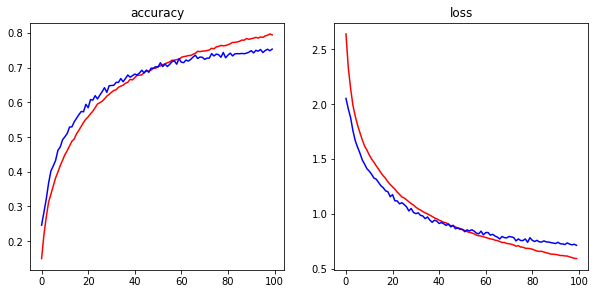

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.plot(hist.history['accuracy'], color='r')
plt.plot(hist.history['val_accuracy'], color='b')
plt.title('accuracy')

#loss 조회
plt.subplot(2, 2, 2)
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.title('loss')
plt.show()

In [11]:
pred = model.predict(X_test)
label = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RebatchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AutoShardDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MultiDeviceIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op GeneratorDataset in device /job:localhost/replica:0/task:0/device:GPU:0
Ex

9  vs  9
7  vs  7
0  vs  0
3  vs  5
2  vs  2
3  vs  4
6  vs  6
4  vs  4
9  vs  9
5  vs  3
1  vs  8
0  vs  9
4  vs  4
7  vs  7
8  vs  8
5  vs  5
7  vs  7
8  vs  8
3  vs  3
9  vs  9
6  vs  6
7  vs  7
7  vs  7
5  vs  5
8  vs  8
3  vs  7
3  vs  5
9  vs  9
8  vs  1
6  vs  6
4  vs  4
3  vs  3


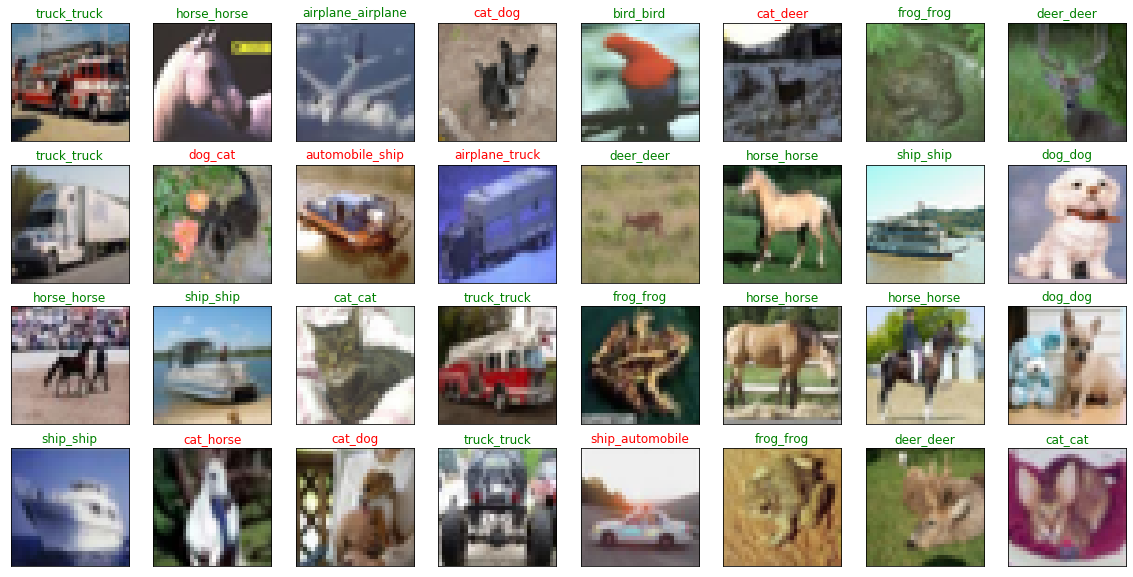

In [12]:
fig = plt.figure(figsize=(20,10))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32)):
    ax = fig.add_subplot(4, 8, i+1, xticks=[], yticks=[]) ##32개
    ax.imshow(X_test[idx])
    pred_idx = np.argmax(pred[idx]) #iinverse one hot encode : prediction label 
    true_idx = np.argmax(Y_test[idx])# iinverse one hot encode :
    print(pred_idx, " vs ", true_idx)
    ax.set_title("{}_{}".format(label[pred_idx], label[true_idx]), color='green' if pred_idx == true_idx else 'red')

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


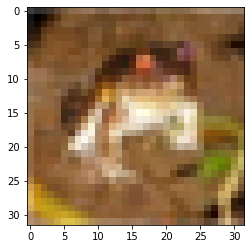

In [13]:
plt.imshow(X_train[0])
print(Y_train[0])



[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


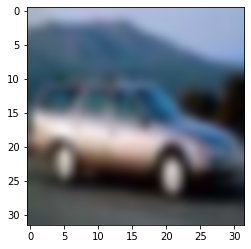

In [14]:
plt.imshow(X_train[4], interpolation="bicubic")
print(Y_train[4])
